In [1]:
import pandas as pd

In [2]:
# 곡 정보 파일 불러오기
df = pd.read_csv('../Data/song_data_yewon_ver05.csv')

In [3]:
# 가수 정보 파일 불러오기
df2 = pd.read_csv('../Data/idol_list.csv', encoding='euc-kr')

In [4]:
df2.head()

,artist,artist_eng,member_num,leader_name,gender,agency
0,서태지와 아이들,SeoTaiji And Boys,3,서태지,남,요요 기획
1,더 블루,The Blue,2,손지창,남,SM 엔터테인먼트
2,잼,Zam,5,조진수,혼,DSP 미디어
3,에스오에스,S.O.S,4,NaN,여,삼포니 레코드
4,솔리드,Solid,3,정재윤,남,비앤비


In [5]:
# 곡 정보와 가수 정보를 머지해준다.
song = pd.merge(df, df2, on='artist')
song.head(3)

,Unnamed: 0,title,artist,album,release_date,song_genre,is_title,like,lyrics,lyricist,composer,arranger,artist_eng,member_num,leader_name,gender,agency
0,0,태지 보이스,서태지와 아이들,시대유감(時代遺憾),1996.06.07,Rock,수록곡,269,갈수 없는 곳이란 우리에겐 없어<br>보이는 길밖에도 세상은 있어<br>언제나 식지...,서태지,서태지,서태지,SeoTaiji And Boys,3,서태지,남,요요 기획
1,1,시대유감(時代遺憾),서태지와 아이들,시대유감(時代遺憾),1996.06.07,Rock,타이틀 곡,"3,256",왜 기다려 왔잖아<br>모든 삶을 포기하는 소리를<br>이 세상이 모두 미쳐버릴<b...,서태지,서태지,서태지,SeoTaiji And Boys,3,서태지,남,요요 기획
2,2,수시아(誰是我),서태지와 아이들,시대유감(時代遺憾),1996.06.07,Rock,수록곡,488,이 세상 그 누구도 나를 닮을 순 없네<br>날 세상에 알릴 거야<br>나 역시 그...,서태지,서태지,서태지,SeoTaiji And Boys,3,서태지,남,요요 기획


In [6]:
# 가사 분석에 용이하도록 <br>을 공백으로 바꿔준다.
# song['lyrics'] = song['lyrics'].str.replace(r'<br>', ' ')

In [7]:
# 제목의 공백(띄어쓰기)를 모두 제거한다 
song['title'] = song['title'].str.replace(r' ', '')

In [8]:
# 제목의 영어 부분을 전부 소문자로 바꿔준다
song['title'] = song['title'].str.lower()

In [ ]:
song = song.drop_duplicates(['artist', 'title'], keep='last')

In [74]:
# 중복 값을 찍어보니 잘 지워졌다! (띄어쓰기 제거 테스트)
song[song['title'] == '결혼 하지마']

,Unnamed: 0,title,artist,album,release_date,song_genre,is_title,like,lyrics,lyricist,composer,arranger,artist_eng,member_num,leader_name,gender,agency


In [75]:
# 중복 값을 찍어보니 잘 지워졌다! (영어 대->소문자 변환 테스트)
song[song['title'] == '어이(UH-EE)']

,Unnamed: 0,title,artist,album,release_date,song_genre,is_title,like,lyrics,lyricist,composer,arranger,artist_eng,member_num,leader_name,gender,agency


In [9]:
# 제목 열을 새로 만들어서 
song['t'] = song['title']

In [11]:
# 괄호 안의 부분을 없앤다.
song.t = song.t.str.replace(r'\(.*?\)','')

In [17]:
# song[song.artist == '신화'][['title', 't']]

In [16]:
# 새로 만든 열의 중복값을 제거한다.
song = song.drop_duplicates(['artist', 't'], keep='last')

In [52]:
# 새로 만든 열을 다시 지워준다.
song.drop('t', axis = 1)

,Unnamed: 0,title,artist,album,release_date,song_genre,is_title,like,lyrics,lyricist,composer,arranger,artist_eng,member_num,leader_name,gender,agency
0,0,태지보이스,서태지와 아이들,시대유감(時代遺憾),1996.06.07,Rock,수록곡,269,갈수 없는 곳이란 우리에겐 없어 보이는 길밖에도 세상은 있어 언제나 식지않는 마음이...,서태지,서태지,서태지,SeoTaiji And Boys,3,서태지,남,요요 기획
3,3,freestyle,서태지와 아이들,시대유감(時代遺憾),1996.06.07,Rock,수록곡,599,항상 난 지나치기만 했네 이젠 난 미련없이 끝내 됐어 찾아냈어 난 모두가 또 나를 ...,"서태지 , 김종서","서태지 , 김종서",서태지,SeoTaiji And Boys,3,서태지,남,요요 기획
4,4,난알아요,서태지와 아이들,Seotaji And Boys Good Bye Best Album,1996.02.10,Dance,타이틀 곡,620,난 알아요이밤이 흐르고 흐르면 누군가가 나를 떠나버려야 한다는 그사실을 그 이유를 ...,서태지,서태지,서태지,SeoTaiji And Boys,3,서태지,남,요요 기획
5,5,너와함께한시간속에서,서태지와 아이들,Seotaji And Boys Good Bye Best Album,1996.02.10,Ballad,수록곡,592,너와 함께 한 시간 속에서- 너를 처음 만난 그때를 자세하게 말해 줄 수는 없지...,서태지,서태지,서태지,SeoTaiji And Boys,3,서태지,남,요요 기획
8,8,너에게,서태지와 아이들,Seotaji And Boys Good Bye Best Album,1996.02.10,Ballad,인기 곡,"4,758",니가 아무리 지금 날 좋아한다고 해도 그건 지금뿐일지도 몰라 왜냐하면 어 그건 말야...,"서태지 , WILLIAM BYUN",서태지,서태지,SeoTaiji And Boys,3,서태지,남,요요 기획
9,9,우리들만의추억,서태지와 아이들,Seotaji And Boys Good Bye Best Album,1996.02.10,Ballad,인기 곡,"2,048",한결 같은 너희들의 정성이 우리에겐 너무 커다란 힘이 되었지 편지속에 수많았던 사연...,서태지,서태지,서태지,SeoTaiji And Boys,3,서태지,남,요요 기획
12,12,교실이데아,서태지와 아이들,Seotaji And Boys Good Bye Best Album,1996.02.10,Rock,인기 곡,435,됐어 됐어 됐어 됐어 이제 그런 가르침은 됐어 그걸로 족해 족해 족해 족해 내 사투...,서태지,서태지,서태지,SeoTaiji And Boys,3,서태지,남,요요 기획
13,13,comebackhome,서태지와 아이들,Seotaji And Boys Good Bye Best Album,1996.02.10,Dance,수록곡,398,난 지금 무엇을 찾으려고 애를 쓰는 걸까 난 지금 어디로 쉬지않고 흘러가는가 난 내...,서태지,서태지,서태지,SeoTaiji And Boys,3,서태지,남,요요 기획
14,14,슬픈아픔,서태지와 아이들,Seotaji And Boys Good Bye Best Album,1996.02.10,Ballad,수록곡,344,나는 몇 해 전인가 빛을 버리고 어둠을 맞이 할 수 밖에 없었네 이젠 분명히 내가 ...,서태지,서태지,서태지,SeoTaiji And Boys,3,서태지,남,요요 기획
16,16,goodbye,서태지와 아이들,Seotaji And Boys Good Bye Best Album,1996.02.10,Ballad,인기 곡,"1,683",지나간 일을 난 오늘 생각해봤지 내겐 아름다웠던 기억들만 생각나 약속되었던 헤어짐을...,서태지,서태지,서태지,SeoTaiji And Boys,3,서태지,남,요요 기획


In [53]:
song.shape

(9534, 18)

In [54]:
# 타이틀 곡은 몇곡일까
len(song[song.is_title == '타이틀 곡'])

1583

In [55]:
!pip install soynlp
!pip show soynlp

Name: soynlp
Version: 0.0.46
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /Users/yunkim/anaconda3/lib/python3.6/site-packages
Requires: psutil, numpy
Required-by: 


In [56]:
!pip install gensim
!pip show gensim

Name: gensim
Version: 3.5.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPLv2.1
Location: /Users/yunkim/anaconda3/lib/python3.6/site-packages
Requires: six, smart-open, numpy, scipy
Required-by: 


In [57]:
import numpy as np
import re

In [58]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [59]:
female = song[song['gender'] == '여']
female

,Unnamed: 0,title,artist,album,release_date,song_genre,is_title,like,lyrics,lyricist,composer,arranger,artist_eng,member_num,leader_name,gender,agency,t
72,72,이제는바꿀수있어요,에스오에스,처음 느낌 그대로,1993,Dance,수록곡,6,간직하고픈 꿈 있는 친구여 푸른 바다와 하늘을 보아요 때론 실의와 고뇌에 잠들어 어...,NaN,NaN,NaN,S.O.S,4,NaN,여,삼포니 레코드,이제는바꿀수있어요
73,73,처음느낌그대로,에스오에스,처음 느낌 그대로,1993,Dance,수록곡,15,너만을 그리워하는만큼 넌 내게 다가오진 않았어 차가운 듯한 미소를 띠고 있던 네 모...,NaN,NaN,NaN,S.O.S,4,NaN,여,삼포니 레코드,처음느낌그대로
74,74,발렌타인,에스오에스,처음 느낌 그대로,1993,Dance,수록곡,3,언젠가 당신에게 주고팠던 내 작은 사랑을 오늘밤 당신에게 나는 꼭 주고 싶어요 조금...,NaN,NaN,NaN,S.O.S,4,NaN,여,삼포니 레코드,발렌타인
75,75,하지만...넌,에스오에스,처음 느낌 그대로,1993,Dance,인기 곡,3,너를 미워하지만 하지만 그댄 나를 떠났잖아 언제나 그렇듯 난 꾹 꾹 참고만 지냈지 ...,NaN,NaN,NaN,S.O.S,4,NaN,여,삼포니 레코드,하지만...넌
76,76,너의바보,에스오에스,처음 느낌 그대로,1993,Dance,타이틀 곡,7,샤일라라 샤일라라 샤일라라 샤일라라 온종일 너의 전활 기다려 너에게 건네준 나의 번...,NaN,NaN,NaN,S.O.S,4,NaN,여,삼포니 레코드,너의바보
1347,1347,천사표,쎄쎄쎄,쎄쎄쎄 Vol.2,1996.12.01,Dance,침묵,37,나이제 끝났어 너는 모든게 변명일 뿐이야 그동안 날 피하던 그 이유가 날 떠나갈 준...,NaN,NaN,NaN,Se Se Se,3,NaN,여,희레코드,천사표
1348,1348,언제나네곁에,쎄쎄쎄,쎄쎄쎄 Vol.2,1996.12.01,Ballad,인기 곡,27,난 믿고 있었어 언젠가는 웃음 지을 너란걸 아직도 네게 힘겨운 이별 남았다면 내가 ...,NaN,NaN,NaN,Se Se Se,3,NaN,여,희레코드,언제나네곁에
1349,1349,오락가락,쎄쎄쎄,쎄쎄쎄 Vol.2,1996.12.01,Dance,Betty,7,지금까지 울고있었던 거야 외외로움에 빠져든거야 이제 그렇게 떠나간 너때문에 슬픔에 ...,NaN,NaN,NaN,Se Se Se,3,NaN,여,희레코드,오락가락
1350,1350,nextday,쎄쎄쎄,쎄쎄쎄 Vol.2,1996.12.01,Dance,무모한 사랑/그날까지,3,RAP 그의 목소리가 귓전에 울렸다 그 날 어떻게 집으로 돌아왔는지 모른다 그러나 ...,NaN,NaN,NaN,Se Se Se,3,NaN,여,희레코드,nextday
1351,1351,넌성공한거야,쎄쎄쎄,쎄쎄쎄 Vol.2,1996.12.01,Dance,타이틀 곡,8,뭘기대해 이제와서 나에게 아직 왜내 주변을 맴돌아 나를 괴롭히는거야 나때문에 받은 ...,NaN,NaN,NaN,Se Se Se,3,NaN,여,희레코드,넌성공한거야


In [60]:
female.shape

(3264, 18)

In [61]:
# 여자아이돌 곡 중 가사에 '오빠' (혹은 오빤)가 등장하는 곡 수는?
female_o = female[female['lyrics'].str.contains(r"(오빠|오빤)")]
female_o.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


(50, 18)

In [62]:
# 여자아이돌 곡 중 가사에 '누나' (혹은 누난)가 등장하는 곡 수는?
female_n = female[female['lyrics'].str.contains(r"(누나|누난)", na=False)]
female_n.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


(10, 18)

In [63]:
male = song[song['gender'] == '남']
# 남자아이돌 전체 곡 수
male.shape

(5780, 18)

In [141]:
# 남자아이돌 곡 중 가사에 '누나'(혹은 누난)가 등장하는 곡 수는?
male_n = male[male['lyrics'].str.contains(r"(누나|누난)", na=False)]
male_n.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


(28, 18)

In [65]:
# 남자아이돌 곡 중 가사에 '오빠'가 등장하는 곡 수는?
male_o = male[male['lyrics'].str.contains(r"(오빠|오빤)", na=False)]
male_o.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


(49, 18)

In [66]:
def preprocessing(text):
    # 개행문자 제거
    text =  text.strip('\t\n\r')
    pattern = re.compile(r'\s+')
    text = re.sub(pattern, ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [67]:
def tokenize(df):
    sentences = df['lyrics'].apply(preprocessing)
    tokens = sentences.apply(tokenizer.tokenize)
    sentences = list( map(str, sentences) )
    tokens = tokens.tolist()
    tokens_all = sum(tokens, [])
    return tokens_all

In [101]:
female_t = tokenize(female)

In [99]:
male_t = tokenize(male)

In [80]:
indices_n = [i for i, x in enumerate(male_n_t) if x == search_word]
indices_n[:10]

[227, 241, 370, 851, 1003, 1433, 1588, 1716, 3069, 3446]

In [82]:
i = 0
result2 = []
for i in range(len(indices_n)):
    next_word_2 = male_n_t[indices_n[i]:indices_n[i] + 5]
    result2.append(next_word_2)
    i+=1
    continue
result2

[['누나', '저기', '여기', '옷좀', '갖다주세요'],
 ['누나', '나도', '여기좀', '알았어요', '야'],
 ['누나', '이젠', '전화도', '안와', '우리'],
 ['누나', '품에서', '난', '오늘', '다시'],
 ['누나', '쌍꺼풀수술은', '기본으로', '한다고', '해요'],
 ['누나', '보단', '자기라고', '불려지길', '원하는'],
 ['누나', '너무', '예쁜누나', '사랑스런누나', '그누가'],
 ['누나', '찾아', '삼만리', '아', '깊은밤'],
 ['누나', '위로받고', '싶을', '때', '그녀는'],
 ['누나', '익히', '소문난', '천사', '조련사'],
 ['누나', '그만', '좀', '질투해요', '귀찮게'],
 ['누나', '소개시켜줄래', '햇살보다', '밝은', '웃음'],
 ['누나', '소개시켜줄래', '아직은', '어설퍼도', '정말'],
 ['누나', 'I', 'I', 'wanna', '너네'],
 ['누나', 'Wanna', '누나', 'I', 'I'],
 ['누나', 'I', 'I', 'wanna', '너네'],
 ['누나', 'Wanna', '누나', 'I', 'I'],
 ['누나', 'I', 'I', 'wanna', '너네'],
 ['누나', 'Wanna', '누나', 'I', 'I'],
 ['누나', 'I', 'I', 'wanna', '너네'],
 ['누나', 'uh', '누나', '누가', '누날'],
 ['누나', '누가', '누날', '건들이면', '그게'],
 ['누나', '소개시켜줄래', '햇살보다', '밝은', '웃음'],
 ['누나', '소개시켜줄래', '아직은', '어설퍼도', '정말'],
 ['누나', '너무', '예쁜', '걸', '난'],
 ['누나', '소개시켜줄래', '햇살보다', '밝은', '웃음'],
 ['누나', '소개시켜줄래', '아직은', '어설퍼도', '정말'],
 ['누나', 'I', 'I', 'wanna', '너네'

In [71]:
i = 0
result2 = []
for i in range(len(indices2)):
    next_word_2 = male_t[indices2[i]:indices2[i] + 5]
    result2.append(next_word_2)
    i+=1
    continue
result2

[['오빠', '차', '뽑았다', '널', '데리러'],
 ['오빠', '다행인지', '불행인지', '난', '죽지'],
 ['오빠', '내가', '병원에서', '나갈즈음엔', '세상이'],
 ['오빠', '아니야', '니', '옆에', '그'],
 ['오빠', '말', '안', '들리니', '오'],
 ['오빠', '노래', '불러줘요', '어떤', '걸'],
 ['오빠', '노래', '불러줘요', '발라드', '블루스'],
 ['오빠', '오빠', 'Everywhere', '세계적인', 'Gentleman'],
 ['오빠', 'Everywhere', '세계적인', 'Gentleman', 'Mis'],
 ['오빠', '나도', '데려가', '일요일', 'OK'],
 ['오빠', '오빠', 'Tokyo', 'London', 'New'],
 ['오빠', 'Tokyo', 'London', 'New', 'York'],
 ['오빠', '오빠', 'I', 'm', 'so'],
 ['오빠', 'I', 'm', 'so', 'cool'],
 ['오빠', '오빠', '이리저리', '이쁜이', '있는'],
 ['오빠', '이리저리', '이쁜이', '있는', '곳에'],
 ['오빠', '집에', '가지마', '라고', '하지마'],
 ['오빠', '아싸', '기분', '좋다', '오늘'],
 ['오빠', '오빠', 'Tokyo', 'London', 'New'],
 ['오빠', 'Tokyo', 'London', 'New', 'York'],
 ['오빠', '오빠', 'I', 'm', 'so'],
 ['오빠', 'I', 'm', 'so', 'cool'],
 ['오빠', '오빠', '내가', '떴다하면', '다'],
 ['오빠', '내가', '떴다하면', '다', '외쳐'],
 ['오빠', '오빠', 'Tokyo', 'London', 'New'],
 ['오빠', 'Tokyo', 'London', 'New', 'York'],
 ['오빠', '오빠', 'I', 'm', 'so'],
 ['

In [41]:
# 하나의 리스트로 만들어주기
result2 = sum(result2, [])
result2

['오빠',
 '차',
 '뽑았다',
 '널',
 '데리러',
 '오빠',
 '다행인지',
 '불행인지',
 '난',
 '죽지',
 '오빠',
 '내가',
 '병원에서',
 '나갈즈음엔',
 '세상이',
 '오빠',
 '아니야',
 '니',
 '옆에',
 '그',
 '오빠',
 '말',
 '안',
 '들리니',
 '오',
 '오빠',
 '노래',
 '불러줘요',
 '어떤',
 '걸',
 '오빠',
 '노래',
 '불러줘요',
 '발라드',
 '블루스',
 '오빠',
 '오빠',
 'Everywhere',
 '세계적인',
 'Gentleman',
 '오빠',
 'Everywhere',
 '세계적인',
 'Gentleman',
 'Mis',
 '오빠',
 '나도',
 '데려가',
 '일요일',
 'OK',
 '오빠',
 '오빠',
 'Tokyo',
 'London',
 'New',
 '오빠',
 'Tokyo',
 'London',
 'New',
 'York',
 '오빠',
 '오빠',
 'I',
 'm',
 'so',
 '오빠',
 'I',
 'm',
 'so',
 'cool',
 '오빠',
 '오빠',
 '이리저리',
 '이쁜이',
 '있는',
 '오빠',
 '이리저리',
 '이쁜이',
 '있는',
 '곳에',
 '오빠',
 '집에',
 '가지마',
 '라고',
 '하지마',
 '오빠',
 '아싸',
 '기분',
 '좋다',
 '오늘',
 '오빠',
 '오빠',
 'Tokyo',
 'London',
 'New',
 '오빠',
 'Tokyo',
 'London',
 'New',
 'York',
 '오빠',
 '오빠',
 'I',
 'm',
 'so',
 '오빠',
 'I',
 'm',
 'so',
 'cool',
 '오빠',
 '오빠',
 '내가',
 '떴다하면',
 '다',
 '오빠',
 '내가',
 '떴다하면',
 '다',
 '외쳐',
 '오빠',
 '오빠',
 'Tokyo',
 'London',
 'New',
 '오빠',
 'Tokyo',
 'London',

In [43]:
# 두 음절 이상으로 묶어준다.
more_words = []
for v in result2:
    if len(v) > 1:
         more_words.append(v)

In [44]:
from collections import Counter

Counter(more_words).most_common(30)

[('오빠', 141),
 ('Tokyo', 22),
 ('London', 22),
 ('New', 22),
 ('so', 22),
 ('내가', 15),
 ('York', 11),
 ('cool', 11),
 ('떴다하면', 8),
 ('떴다', 6),
 ('하면', 6),
 ('이리저리', 4),
 ('이쁜이', 4),
 ('있는', 4),
 ('외쳐', 4),
 ('라고', 3),
 ('그댄', 3),
 ('거야', 3),
 ('말해', 3),
 ('돼줄게', 3),
 ('그거', 3),
 ('노래', 2),
 ('불러줘요', 2),
 ('Everywhere', 2),
 ('세계적인', 2),
 ('Gentleman', 2),
 ('OK', 2),
 ('곳에', 2),
 ('집에', 2),
 ('가지마', 2)]

In [110]:
male_n_t = tokenize(male_n)
male_n_t

['재원아',
 '너',
 '그거',
 '편지지',
 '그거',
 '무슨',
 '편진데',
 '그렇게',
 '갖고다녀',
 '아',
 '이거',
 '뭐야',
 '그거',
 '아',
 '팬레터',
 '근데',
 '왜이렇게',
 '가슴에',
 '안고다녀',
 '너',
 '사귀지',
 '그거',
 '러브레터',
 '아냐',
 '아',
 '형',
 '하지마',
 '아니야',
 '그냥',
 '이게',
 '좀',
 '정성이',
 '많이',
 '들어가서',
 '고마워서',
 '가지고',
 '다닐려고',
 '그냥',
 '액자해서',
 '걸어놓으면',
 '되잖아',
 '임마',
 '아',
 '근데',
 '토니형이',
 '액자해놓은거',
 '있잖아',
 '그거',
 '종이학',
 '천마리',
 '전에는',
 '그런',
 '생각을',
 '좀',
 '못했었는데',
 '정성을',
 '다해서',
 '만든',
 '팬레터라서',
 '이젠',
 '좀',
 '갖고',
 '다닐려고',
 '아이',
 '자식',
 '그래',
 '난',
 '집에서',
 '집까지',
 '나올때',
 '굉장히',
 '우리',
 '공백기간이',
 '길었었잖아',
 '그',
 '집',
 '징크스라는거',
 '있잖아',
 '그런거',
 '땜에',
 '정말',
 '미칠것',
 '같았거든',
 '진짜',
 '불안했지',
 '그때',
 '근데',
 '우리',
 '다시',
 '나왔을때',
 '방송국에서',
 '막',
 '플랜카드',
 '그',
 '많이',
 '막',
 '들고',
 '있는걸',
 '보니까',
 '정말',
 '눈물이',
 '나더라',
 '장난',
 '아니었지',
 '아',
 '그리고',
 '우리',
 '숙소',
 '앞에서',
 '비가',
 '오나',
 '눈이오나',
 '기다리는',
 '팬들',
 '있잖아',
 '그럴땐',
 '정말',
 '어떻게',
 '하냐',
 '미안해',
 '너무',
 '미안해',
 '우리끼리',
 '식사당번을',
 '이렇게',
 '정해가지고',
 '막',
 '밥을',
 '해주면',
 '어떨까',


In [124]:
# 두 음절 이상으로 묶어준다.
more_words = []
for v in male_n_t:
    if len(v) > 1:
         more_words.append(v)

In [126]:
from collections import Counter

Counter(more_words).most_common(30)

[('come', 74),
 ('Girls', 59),
 ('girl', 57),
 ('너무', 53),
 ('내가', 51),
 ('Replay', 50),
 ('on', 47),
 ('you', 46),
 ('the', 45),
 ('누나', 44),
 ('it', 44),
 ('너의', 38),
 ('이제', 38),
 ('모두', 35),
 ('누난', 35),
 ('SHINee', 35),
 ('me', 33),
 ('우리', 32),
 ('정말', 31),
 ('my', 30),
 ('Oh', 30),
 ('이젠', 29),
 ('Dreams', 29),
 ('Money', 29),
 ('Let', 28),
 ('나는', 27),
 ('wanna', 27),
 ('예뻐', 26),
 ('붐벼', 26),
 ('in', 25)]

In [117]:
# 함수로 만들고 싶음..
def next_word(tokenized_list, search_word):
    indices2 = [i for i, x in enumerate(tokenized_list) if x == search_word]
    i = 0
    result2 = []
    for i in range(len(indices2)):
        next_word_2 = tokenized_list[indices2[i]:indices2[i] + 5]
        result2.append(next_word_2)
        i+=1
    print(result2)

In [118]:
next_word(female_t, '오빠')

[['오빠', '소식을', '들었어요', '새로운', '그녀가'], ['오빠', '나', '오늘', '밤에', '놀러'], ['오빠', '넌', '항상', '그래', '날'], ['오빠', '화', '내지', '마', 'OH'], ['오빠', '너는', '잘', '놀지', '않는'], ['오빠', '화내지', '마', 'OH', 'BABY'], ['오빠', '화내지', '마', 'OH', 'BABY'], ['오빠', '알았지', '어', '여보세요', '함께'], ['오빠', '오빠', 'I', 'll', 'be'], ['오빠', 'I', 'll', 'be', 'I'], ['오빠', '나', '좀', '봐', '나를'], ['오빠', '오빠', 'I', 'll', 'be'], ['오빠', 'I', 'll', 'be', 'I'], ['오빠', '잠깐만', '잠깐만', '들어봐', '자꾸'], ['오빠', '오빠', '이대로는', 'No', 'No'], ['오빠', '이대로는', 'No', 'No', 'No'], ['오빠', '믿어', '비싼', '차로', '시작되는'], ['오빠', '믿지', '쿨한', '척', '멋진'], ['오빠', '오빠', '날', '사랑해줘', '지금'], ['오빠', '날', '사랑해줘', '지금', 'all'], ['오빠', '오빠', '날', '사랑해줘', '지금'], ['오빠', '날', '사랑해줘', '지금', 'all'], ['오빠', '오빠', '날', '사랑해줘', '지금'], ['오빠', '날', '사랑해줘', '지금', 'all'], ['오빠', '오오오', '틈만', '나면', '힐끔힐끔'], ['오빠', '응', '오빠', '내가', '어디가'], ['오빠', '내가', '어디가', '좋아', '음'], ['오빠', '무슨', '일', '있어', '요새'], ['오빠', '선배', '하다가도', '가끔은', '야할'], ['오빠', '모두', '모여', 'DANCE', 'EVERYBODY'], ['오빠', '일어났

In [119]:
next_word(female_t, '누나')

[['누나', '아닐거야', '이', '못난', '것'], ['누나', '마음', '한번', '떠봤다고', '여린'], ['누나', '불러도', '나', '안', '돌아봐'], ['누나', '라라', '밥', '먹자', 'I']]


In [112]:
next_word(male_t, '오빠')

[['오빠', '차', '뽑았다', '널', '데리러'], ['오빠', '다행인지', '불행인지', '난', '죽지'], ['오빠', '내가', '병원에서', '나갈즈음엔', '세상이'], ['오빠', '아니야', '니', '옆에', '그'], ['오빠', '말', '안', '들리니', '오'], ['오빠', '노래', '불러줘요', '어떤', '걸'], ['오빠', '노래', '불러줘요', '발라드', '블루스'], ['오빠', '오빠', 'Everywhere', '세계적인', 'Gentleman'], ['오빠', 'Everywhere', '세계적인', 'Gentleman', 'Mis'], ['오빠', '나도', '데려가', '일요일', 'OK'], ['오빠', '오빠', 'Tokyo', 'London', 'New'], ['오빠', 'Tokyo', 'London', 'New', 'York'], ['오빠', '오빠', 'I', 'm', 'so'], ['오빠', 'I', 'm', 'so', 'cool'], ['오빠', '오빠', '이리저리', '이쁜이', '있는'], ['오빠', '이리저리', '이쁜이', '있는', '곳에'], ['오빠', '집에', '가지마', '라고', '하지마'], ['오빠', '아싸', '기분', '좋다', '오늘'], ['오빠', '오빠', 'Tokyo', 'London', 'New'], ['오빠', 'Tokyo', 'London', 'New', 'York'], ['오빠', '오빠', 'I', 'm', 'so'], ['오빠', 'I', 'm', 'so', 'cool'], ['오빠', '오빠', '내가', '떴다하면', '다'], ['오빠', '내가', '떴다하면', '다', '외쳐'], ['오빠', '오빠', 'Tokyo', 'London', 'New'], ['오빠', 'Tokyo', 'London', 'New', 'York'], ['오빠', '오빠', 'I', 'm', 'so'], ['오빠', 'I', 'm', 'so', 'cool'

In [113]:
next_word(male_t, '누나')

[['누나', '저기', '여기', '옷좀', '갖다주세요'], ['누나', '나도', '여기좀', '알았어요', '야'], ['누나', '이젠', '전화도', '안와', '우리'], ['누나', '품에서', '난', '오늘', '다시'], ['누나', '쌍꺼풀수술은', '기본으로', '한다고', '해요'], ['누나', '보단', '자기라고', '불려지길', '원하는'], ['누나', '너무', '예쁜누나', '사랑스런누나', '그누가'], ['누나', '찾아', '삼만리', '아', '깊은밤'], ['누나', '위로받고', '싶을', '때', '그녀는'], ['누나', '익히', '소문난', '천사', '조련사'], ['누나', '그만', '좀', '질투해요', '귀찮게'], ['누나', '소개시켜줄래', '햇살보다', '밝은', '웃음'], ['누나', '소개시켜줄래', '아직은', '어설퍼도', '정말'], ['누나', 'I', 'I', 'wanna', '너네'], ['누나', 'Wanna', '누나', 'I', 'I'], ['누나', 'I', 'I', 'wanna', '너네'], ['누나', 'Wanna', '누나', 'I', 'I'], ['누나', 'I', 'I', 'wanna', '너네'], ['누나', 'Wanna', '누나', 'I', 'I'], ['누나', 'I', 'I', 'wanna', '너네'], ['누나', 'uh', '누나', '누가', '누날'], ['누나', '누가', '누날', '건들이면', '그게'], ['누나', '소개시켜줄래', '햇살보다', '밝은', '웃음'], ['누나', '소개시켜줄래', '아직은', '어설퍼도', '정말'], ['누나', '너무', '예쁜', '걸', '난'], ['누나', '소개시켜줄래', '햇살보다', '밝은', '웃음'], ['누나', '소개시켜줄래', '아직은', '어설퍼도', '정말'], ['누나', 'I', 'I', 'wanna', '너네'], ['누나', 'Wanna', '누나', 'I

In [95]:
type(result2)

list

In [120]:
# 남자아이돌 곡의 가사 중 '요'로 끝나는 단어가 등장하는 곡 수는?
male_n = len(male[male['lyrics'].str.contains(".{1,4}요$", na=False)])
male_n

202

In [121]:
# 남자아이돌 곡의 가사 중 '요'로 끝나는 단어가 등장하는 곡 수는?
female_n = len(female[female['lyrics'].str.contains(".{1,4}요$", na=False)])
female_n

164

In [122]:
import multiprocessing
import numpy as np

In [123]:
p = [[51, 3365], [11, 3365], [51, 6160], [24, 6160]]

In [124]:
p[0][0]

51

In [125]:
def percent(p):
    i = 0
    a = 0
    b = 1
    percentage = '{0:.2f}'.format((float(p[i][a]) / float(p[i][b]) * 100))
    i =+ 1
    return percentage

In [126]:
# percent(p[0])

In [ ]:
# >>> zs = zip(xs, ys)
# >>> zs
# [(1, 10), (2, 20), (3, 30), (4, 40), (5, 50)]
# >>> map(lambda (x,y): x+y, zs)
# [11, 22, 33, 44, 55]

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = 'NanumBarunGothic'
category_count.plot(kind='bar', color=['royalblue', 'orange', 'royalblue', 'orange'])  #X11 color names 로 검색
# plt.bar(y_pos, height, color=['blue', 'orange', 'blue', 'orange',])
plt.xticks(rotation=90)

NameError: name 'category_count' is not defined

In [ ]:
def percent(num1, num2):
    num1 = float(num1)
    num2 = float(num2)
    percentage = '{0:.2f}'.format((num1 / num2 * 100))
    return percentage

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

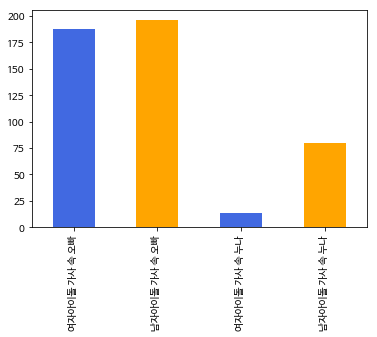

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = 'NanumBarunGothic'
category_count.plot(kind='bar', color=['royalblue', 'orange', 'royalblue', 'orange'])  #X11 color names 로 검색
# plt.bar(y_pos, height, color=['blue', 'orange', 'blue', 'orange',])
plt.xticks(rotation=90)

In [129]:
def percent(num1, num2):
    num1 = float(num1)
    num2 = float(num2)
    percentage = '{0:.3f}'.format((num1 / num2 * 10))
    return percentage

In [143]:
# 여자아이돌 곡 중 가사에 '오빠' (혹은 오빤)가 등장하는 곡 비율
percent(50, 3264)

'0.153'

In [145]:
# 남자아이돌 곡 중 가사에 '오빠' (혹은 오빤)가 등장하는 곡 비율
percent(49, 5780)

'0.085'

In [146]:
# 여자아이돌 곡 중 가사에 '누나' (혹은 누난)가 등장하는 곡 비율
percent(10, 3264)

'0.031'

In [147]:
# 남자아이돌 곡 중 가사에 '누나' (혹은 누난)가 등장하는 곡 비율
percent(28, 5780)

'0.048'

In [131]:
# 여자아이돌 곡의 가사 중 '요'로 끝나는 단어가 등장하는 곡 수는?
percent(164, 3264)

'0.487'

In [130]:
# 남자아이돌 곡의 가사 중 '요'로 끝나는 단어가 등장하는 곡 수는?
percent(202, 5780)

'0.328'

In [153]:
category_count4 = pd.Series([0.487, 0.328], index=['여자아이돌 가사 중 \'요\'로 끝나는 곡', '남자아이돌 가사 중 \'요\'로 끝나는 곡'])

(array([0, 1]), <a list of 2 Text xticklabel objects>)

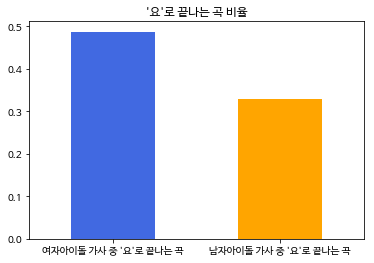

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = 'NanumBarunGothic'
category_count4.plot(kind='bar', color=['royalblue', 'orange', 'royalblue', 'orange'], title='\'요\'로 끝나는 곡 비율')  #X11 color names 로 검색
# plt.bar(y_pos, height, color=['blue', 'orange', 'blue', 'orange',])
plt.xticks(rotation=0)

In [158]:
category_count3 = pd.Series([0.153, 0.048], index=['여자아이돌 가사 속 오빠', '남자아이돌 가사 속 누나'])

(array([0, 1]), <a list of 2 Text xticklabel objects>)

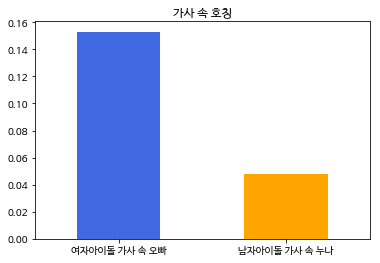

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = 'NanumBarunGothic'
category_count3.plot(kind='bar', color=['royalblue', 'orange', 'royalblue', 'orange'], title='가사 속 호칭')  #X11 color names 로 검색
# plt.bar(y_pos, height, color=['blue', 'orange', 'blue', 'orange',])
plt.xticks(rotation=0)

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = 'NanumBarunGothic'
category_count3.plot(kind='bar', color=['royalblue', 'orange', 'royalblue', 'orange'])  #X11 color names 로 검색
# plt.bar(y_pos, height, color=['blue', 'orange', 'blue', 'orange',])
plt.xticks(rotation=90)

NameError: name 'category_count3' is not defined

In [166]:
category_count2 = pd.Series([0.153, 0.048, 0.031, 0.085], index=['여자아이돌 가사 속 오빠', '남자아이돌 가사 속 누나', '여자아이돌 가사 속 누나', '남자아이돌 가사 속 오빠'])


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

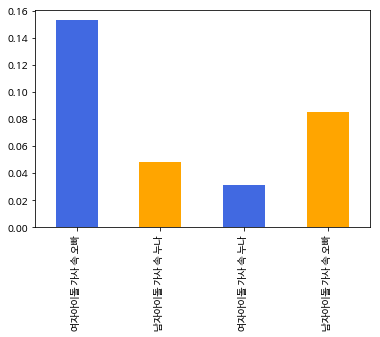

In [167]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = 'NanumBarunGothic'
category_count2.plot(kind='bar', color=['royalblue', 'orange', 'royalblue', 'orange'])  #X11 color names 로 검색
# plt.bar(y_pos, height, color=['blue', 'orange', 'blue', 'orange',])
plt.xticks(rotation=90)

In [12]:
"{:.1%}".format(0.83)

'83.0%'

In [23]:
percentage = '{0:.2f}'.format((num1 / num2 * 100))
return percentage

NameError: name 'num1' is not defined

In [23]:
category_count2 = pd.Series([51, 51, 11, 24], index=['여자아이돌 가사 속 오빠', '남자아이돌 가사 속 오빠', '여자아이돌 가사 속 누나', '남자아이돌 가사 속 누나', ])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

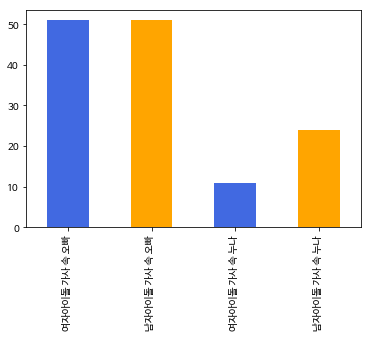

In [24]:
# 곡 수로 바그래프를 그려보자
%matplotlib inline
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = 'NanumBarunGothic'
category_count2.plot(kind='bar', color=['royalblue', 'orange', 'royalblue', 'orange'])  #X11 color names 로 검색
# plt.bar(y_pos, height, color=['blue', 'orange', 'blue', 'orange',])
plt.xticks(rotation=90)

In [110]:
female['lyrics']

72       간직하고픈 꿈 있는 친구여 푸른 바다와 하늘을 보아요 때론 실의와 고뇌에 잠들어 어...
73       너만을 그리워하는만큼 넌 내게 다가오진 않았어 차가운 듯한 미소를 띠고 있던 네 모...
74       언젠가 당신에게 주고팠던 내 작은 사랑을 오늘밤 당신에게 나는 꼭 주고 싶어요 조금...
75       너를 미워하지만 하지만 그댄 나를 떠났잖아 언제나 그렇듯 난 꾹 꾹 참고만 지냈지 ...
76       샤일라라 샤일라라 샤일라라 샤일라라 온종일 너의 전활 기다려 너에게 건네준 나의 번...
1347     나이제 끝났어 너는 모든게 변명일 뿐이야 그동안 날 피하던 그 이유가 날 떠나갈 준...
1348     난 믿고 있었어 언젠가는 웃음 지을 너란걸 아직도 네게 힘겨운 이별 남았다면 내가 ...
1349     지금까지 울고있었던 거야 외외로움에 빠져든거야 이제 그렇게 떠나간 너때문에 슬픔에 ...
1350     RAP 그의 목소리가 귓전에 울렸다 그 날 어떻게 집으로 돌아왔는지 모른다 그러나 ...
1351     뭘기대해 이제와서 나에게 아직 왜내 주변을 맴돌아 나를 괴롭히는거야 나때문에 받은 ...
1352     와뚜와리 와뚜와리 와뚜와리 와뚜와리  맘이 맘이 맘이 맘이 맘이 아파요 날이 날이 ...
1353     도대체 넌 지금 무슨생각을 하고있 <생각은 무슨 아무생각없지> 그런데 왜 자꾸 징그...
1354     내앞에서 눈물흘리는 아련한 여인아 솔직하게 말해보렴 나때문은 아니지 나를 피해 딴짓...
1355     이젠 난 알아 사랑아니란걸 난 그냥너의 자랑거리 고작 그정도였을뿐 더이상 내앞에서 ...
1356     널 만났던 시간들을 끝내기 위해 웃으며 안녕하며 보내야겠지 더 이상 니 마음 속에 ...
1357     왜 그렇게 나에게 무리한걸 요구하니 12시가 넘기 전에 집에 들어가야해 마차가 호박...
1358     도니돈돈이 돈도니돈도니 화려한 음악 속에 쉐이크 쉑 헨드 돈도니돈돈 돈도니돈도니 외.

In [111]:
# 여자 아이돌 가사의 총 길이는? (리스트의 스트링 엘리먼트 수를 셈)
print(len(''.join(sentences)))

2058924


In [ ]:
# 남자 아이돌 가사의 총 길이는?
print(len(''.join(sentences)))

In [91]:
l = ['s', 'sfe', 'sdfwe']
print(max(l, key=len))

sdfwe


In [109]:
elements = ["xxxxxx", "yyy", "z"]
print(len(''.join(elements)))

10


In [ ]:
strings = ['abc', 'de']
print len(''.join(strings))

In [81]:
len(male['lyrics'])

6160

In [84]:
# female을 넣어 tokenize함수를 돌린다
sentences = tokenize(female)

In [112]:
# male을 넣어 tokenize함수를 돌린다
sentences = tokenize(male)

In [86]:
sentences

['간직하고픈',
 '꿈',
 '있는',
 '친구여',
 '푸른',
 '바다와',
 '하늘을',
 '보아요',
 '때론',
 '실의와',
 '고뇌에',
 '잠들어',
 '어둔',
 '빛으로',
 '살',
 '순',
 '없잖아요',
 '세상은',
 '오늘만으로',
 '끝이',
 '나는건',
 '아니예요',
 '이젠',
 '눈물을',
 '닦아요',
 '내일은',
 '다시',
 '우리에게',
 '타오르는',
 '저',
 '태양과',
 '눈',
 '부신',
 '기쁜',
 '날들로',
 '이제는',
 '바꿀',
 '수',
 '있어요',
 '어둠은',
 '걷히고',
 '나의',
 '길을',
 '향하여',
 '어떤',
 '때에는',
 '너무',
 '힘이',
 '들어',
 '누군가',
 '내게',
 '있기를',
 '원했죠',
 '하지만',
 '이젠',
 '언제나',
 '그렇게',
 '후회를',
 '하며',
 '살',
 '순',
 '없잖아요',
 '세상은',
 '오늘만으로',
 '끝이',
 '나는건',
 '아니예요',
 '이젠',
 '눈물을',
 '닦아요',
 '내일은',
 '다시',
 '우리에게',
 '어둠에',
 '지친',
 '과거와',
 '내일의',
 '밝은',
 '미소로',
 '이제는',
 '바꿀',
 '수',
 '있어요',
 '또',
 '다시',
 '일어나',
 '나의',
 '길을',
 '향하여',
 '내일은',
 '다시',
 '우리에게',
 '타오르는',
 '저',
 '태양과',
 '눈',
 '부신',
 '기쁜',
 '날들로',
 '이제는',
 '바꿀',
 '수',
 '있어요',
 '어둠은',
 '걷히고',
 '나의',
 '길을',
 '향하여',
 '내일은',
 '다시',
 '우리에게',
 '어둠에',
 '지친',
 '과거와',
 '내일의',
 '밝은',
 '미소로',
 '이제는',
 '바꿀',
 '수',
 '있어요',
 '또',
 '다시',
 '일어나',
 '나의',
 '길을',
 '향하여',
 '너만을',
 '그리워하는만큼',
 '넌',
 '내게',
 '다가오진

In [61]:
tokens_all

NameError: name 'tokens_all' is not defined

In [ ]:
sentences = tokenize(male)

In [26]:
# match = re.search(r'나', str)

In [27]:
# p = re.compile("^나*")
# result = p.findall(str(sentences))
# result

In [28]:
# r = re.compile("^나*")
# Im = filter(r.match, sentences)
# Im

In [39]:
from soynlp.tokenizer import RegexTokenizer
import gensim
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from gensim import corpora, models
from gensim.models import LdaMulticore
from gensim.models import Word2Vec
from gensim.corpora import Dictionary, MmCorpus


tokenizer = RegexTokenizer()
tokenizer

In [375]:
# %time tokens = sentences.apply(tokenizer.tokenize)

CPU times: user 5.27 s, sys: 57.5 ms, total: 5.33 s
Wall time: 5.34 s


In [376]:
# %time tokens2 = sentences2.apply(tokenizer.tokenize)

CPU times: user 10.2 s, sys: 140 ms, total: 10.4 s
Wall time: 10.6 s


In [377]:
# berry_idx = [i for i, item in enumerate(sentences2) if item.endswith('없다')]
# berry_idx

In [33]:
# sentences = sentences.tolist()

In [378]:
# sentences = list( map(str, sentences) )

In [379]:
# sentences2 = list( map(str, sentences2) )

In [65]:
# 두 음절 이상으로 묶어준다.
more_words = []
for i in sentences:
    for v in i :
        if len(v) > 1:
            more_words.append(v)

In [66]:
more_words

[]

In [382]:
tokens = tokens.tolist()

In [383]:
tokens2 = tokens2.tolist()

In [384]:
# 하나의 리스트로 만들어주기
tokens_all = sum(tokens, [])

In [62]:
from collections import Counter

Counter(sentences).most_common(30)

[('내', 9825),
 ('I', 8942),
 ('you', 7614),
 ('난', 6627),
 ('날', 5726),
 ('me', 5553),
 ('oh', 4497),
 ('t', 4491),
 ('나', 4154),
 ('Oh', 4062),
 ('더', 4061),
 ('널', 4030),
 ('love', 3831),
 ('나를', 3676),
 ('it', 3616),
 ('너', 3476),
 ('내가', 3386),
 ('수', 3332),
 ('넌', 3316),
 ('그', 3198),
 ('my', 2987),
 ('다', 2898),
 ('너의', 2816),
 ('이', 2629),
 ('baby', 2614),
 ('내게', 2571),
 ('너를', 2503),
 ('s', 2383),
 ('왜', 2324),
 ('또', 2310)]

In [386]:
# 하나의 리스트로 만들어주기
tokens_all2 = sum(tokens2, [])

In [387]:
from collections import Counter

Counter(tokens_all2).most_common(30)

[('내', 18251),
 ('I', 16891),
 ('you', 13768),
 ('난', 13313),
 ('널', 10656),
 ('날', 9126),
 ('수', 8605),
 ('t', 8112),
 ('그', 7629),
 ('me', 7577),
 ('내가', 7464),
 ('너를', 7040),
 ('나', 7011),
 ('너의', 6738),
 ('더', 6730),
 ('my', 6309),
 ('넌', 6226),
 ('나를', 6097),
 ('다', 6055),
 ('it', 5829),
 ('이', 5702),
 ('너', 5488),
 ('love', 5465),
 ('Oh', 5444),
 ('s', 5214),
 ('the', 5163),
 ('나의', 5089),
 ('oh', 5053),
 ('없어', 4913),
 ('baby', 4618)]

In [44]:
tokens[:3]

[['간직하고픈',
  '꿈',
  '있는',
  '친구여',
  '푸른',
  '바다와',
  '하늘을',
  '보아요',
  '때론',
  '실의와',
  '고뇌에',
  '잠들어',
  '어둔',
  '빛으로',
  '살',
  '순',
  '없잖아요',
  '세상은',
  '오늘만으로',
  '끝이',
  '나는건',
  '아니예요',
  '이젠',
  '눈물을',
  '닦아요',
  '내일은',
  '다시',
  '우리에게',
  '타오르는',
  '저',
  '태양과',
  '눈',
  '부신',
  '기쁜',
  '날들로',
  '이제는',
  '바꿀',
  '수',
  '있어요',
  '어둠은',
  '걷히고',
  '나의',
  '길을',
  '향하여',
  '어떤',
  '때에는',
  '너무',
  '힘이',
  '들어',
  '누군가',
  '내게',
  '있기를',
  '원했죠',
  '하지만',
  '이젠',
  '언제나',
  '그렇게',
  '후회를',
  '하며',
  '살',
  '순',
  '없잖아요',
  '세상은',
  '오늘만으로',
  '끝이',
  '나는건',
  '아니예요',
  '이젠',
  '눈물을',
  '닦아요',
  '내일은',
  '다시',
  '우리에게',
  '어둠에',
  '지친',
  '과거와',
  '내일의',
  '밝은',
  '미소로',
  '이제는',
  '바꿀',
  '수',
  '있어요',
  '또',
  '다시',
  '일어나',
  '나의',
  '길을',
  '향하여',
  '내일은',
  '다시',
  '우리에게',
  '타오르는',
  '저',
  '태양과',
  '눈',
  '부신',
  '기쁜',
  '날들로',
  '이제는',
  '바꿀',
  '수',
  '있어요',
  '어둠은',
  '걷히고',
  '나의',
  '길을',
  '향하여',
  '내일은',
  '다시',
  '우리에게',
  '어둠에',
  '지친',
  '과거와',
  '내일의',
  '밝은',
  '

In [45]:
tokens_all[:3]

['간직하고픈', '꿈', '있는']

In [46]:
tokens_all[1]

'꿈'

In [104]:
search_word = "여자"
tokens_all.index(search_word)

5166

In [105]:
search_word = "여자"
tokens_all2.index(search_word)

63949

In [106]:
next_word = tokens_all2[tokens_all2.index(search_word):tokens_all2.index(search_word) + 5]
next_word

['여자', '없다고', 'Lovin', 'u', '널']

In [107]:
indices = [i for i, x in enumerate(tokens_all) if x == search_word]
indices[:10]

[5166, 7959, 17289, 34400, 48428, 48524, 55669, 55732, 55765, 55831]

In [108]:
indices2 = [i for i, x in enumerate(tokens_all2) if x == search_word]
indices2[:10]

[63949, 71567, 71943, 76684, 76884, 78233, 80736, 97001, 97062, 127290]

In [109]:
indices[0]

5166

In [110]:
# 가사에 search_word가 몇 번 나오는지 보기
len(indices)

253

In [111]:
# 가사에 search_word가 몇 번 나오는지 보기
len(indices2)

411

In [112]:
# tokens_all[tokens_all.index(search_word)]

In [113]:
# property_asel = [property_a[i] for i in good_indices]

In [114]:
tokens_all[indices[i]:indices[i] + 5]

TypeError: list indices must be integers or slices, not list

In [115]:
# indices의 값들이 index인 모든 search_word의 next_word를 구하고 싶다.
i = 0
result = []
for i in range(len(indices)):
    next_word_1 = tokens_all[indices[i]:indices[i] + 5]
    result.append(next_word_1)
    i+=1
    continue

In [116]:
result

[['여자', '한번', '깊이깊이', '찾아봐', '나처럼'],
 ['여자', '한번', '깊이깊이', '찾아봐', '나처럼'],
 ['여자', '이름을', '부르지', '난', '이해못해'],
 ['여자', '맘을', '너무', '몰라줘', '까만'],
 ['여자', '되고', '싶은맘이', '간절해져요', '혹시'],
 ['여자', '되고', '싶은맘이', '간절해져요', '혹시'],
 ['여자', '해봐', 'oh', '해봐', 'oh'],
 ['여자', '해봐', 'oh', '해봐', 'oh'],
 ['여자', '없어요', '아가씨', '정말', '예뻐요'],
 ['여자', '해봐', 'oh', '해봐', 'oh'],
 ['여자', '해봐', 'oh', '해봐', 'oh'],
 ['여자', '될거라는', '그런', '기대도', '하지마'],
 ['여자', '될거라는', '그런', '기대도', '하지마'],
 ['여자', '원했잖아', '날', '떠나', '세상'],
 ['여자', '만나', '내게', '해준', '만큼'],
 ['여자', '만나', '내게', '해준', '만큼'],
 ['여자', '만난', '걸', '내버려둘까', '그렇게는'],
 ['여자', '없을걸', '오락가락', '고민해봐야', '나만한'],
 ['여자', '없을걸', '오락가락', '고민', '해봐야'],
 ['여자', '차라리', '모두다', '잊자', '그래'],
 ['여자', '웃자웃자', '웃어버리자', '오늘은', '금요일밤이잖아'],
 ['여자', '꽤', '많겠는걸', '스트레스', '좀'],
 ['여자', '손에', '걸친', '백을', '들고'],
 ['여자', '너와', '어울리지', '않아', '걔는'],
 ['여자', '누구와도', '비교할', '수', '없는'],
 ['여자', '난', '그런', '여자', '빛나는'],
 ['여자', '빛나는', '여자', 'Baby', 'J'],
 ['여자', 'Baby', 'J', 'Baby', 'J'],
 ['여

In [117]:
# 하나의 리스트로 만들어주기
result_one = sum(result, [])

In [118]:
i = 0
result2 = []
for i in range(len(indices2)):
    next_word_2 = tokens_all2[indices2[i]:indices2[i] + 5]
    result2.append(next_word_2)
    i+=1
    continue

In [119]:
# i = 0
# result2 = []
# for i in range(len(indices)):
#     next_word_1 = tokens_all2[indices[i] - 5:indices[i] + 5]
#     result2.append(next_word_1)
#     i+=1
#     continue

In [120]:
result2

[['여자', '없다고', 'Lovin', 'u', '널'],
 ['여자', '앞에', '이런', '내모습', '본적'],
 ['여자', '내게', '도와', '달라고', '울며'],
 ['여자', '하나', '때문에', '깨버릴수는', '없는거잖아'],
 ['여자', '앞에', '이런', '내모습', '본적'],
 ['여자', '생겼다는게', '이렇게', '헤어', '나올'],
 ['여자', '내게', '도와', '달라고', '울며'],
 ['여자', '믿을수도', '없는', '우리만의', '썸씽'],
 ['여자', '얼마든지', '옆에', '둘수', '있는'],
 ['여자', '잘생긴', '남자', '팔짱', '끼고'],
 ['여자', '서로의', '개성을', '살리자', '신세대여'],
 ['여자', '여자', '여자는', '감정이', '풍부한'],
 ['여자', '여자는', '감정이', '풍부한', '사람이지'],
 ['여자', '대책', '안', '서', '부모님은'],
 ['여자', '왜', '나를', '모른척', '할까'],
 ['여자', '언짢은', '기분에', '나가려', '할때'],
 ['여자', '애인은', '아닐까', '바로', '그'],
 ['여자', '입을', '다물지', '못해', '너무'],
 ['여자', '옆을', '지나서', '그냥', '사라져갔어'],
 ['여자', '내', '친구', '애인이야', '바로'],
 ['여자', '입을', '다물지못해', '너무', '미안해서'],
 ['여자', '친구가', '만나자고', '하면', '핑계만'],
 ['여자', '누구야라는', '말소리에', '놀라', '정신차리고'],
 ['여자', '처음이야', '나', '정말', '힘들었어'],
 ['여자', '혹은', '내가', '반한', '여자'],
 ['여자', '있어도', '아무말', '못하고', '바보처럼'],
 ['여자', '내', '터프함에', '모두', '다'],
 ['여자', '저', '여자', '모두다', '내'],
 ['여자

In [121]:
# 하나의 리스트로 만들어주기
result_one2 = sum(result2, [])
result_one2

['여자',
 '없다고',
 'Lovin',
 'u',
 '널',
 '여자',
 '앞에',
 '이런',
 '내모습',
 '본적',
 '여자',
 '내게',
 '도와',
 '달라고',
 '울며',
 '여자',
 '하나',
 '때문에',
 '깨버릴수는',
 '없는거잖아',
 '여자',
 '앞에',
 '이런',
 '내모습',
 '본적',
 '여자',
 '생겼다는게',
 '이렇게',
 '헤어',
 '나올',
 '여자',
 '내게',
 '도와',
 '달라고',
 '울며',
 '여자',
 '믿을수도',
 '없는',
 '우리만의',
 '썸씽',
 '여자',
 '얼마든지',
 '옆에',
 '둘수',
 '있는',
 '여자',
 '잘생긴',
 '남자',
 '팔짱',
 '끼고',
 '여자',
 '서로의',
 '개성을',
 '살리자',
 '신세대여',
 '여자',
 '여자',
 '여자는',
 '감정이',
 '풍부한',
 '여자',
 '여자는',
 '감정이',
 '풍부한',
 '사람이지',
 '여자',
 '대책',
 '안',
 '서',
 '부모님은',
 '여자',
 '왜',
 '나를',
 '모른척',
 '할까',
 '여자',
 '언짢은',
 '기분에',
 '나가려',
 '할때',
 '여자',
 '애인은',
 '아닐까',
 '바로',
 '그',
 '여자',
 '입을',
 '다물지',
 '못해',
 '너무',
 '여자',
 '옆을',
 '지나서',
 '그냥',
 '사라져갔어',
 '여자',
 '내',
 '친구',
 '애인이야',
 '바로',
 '여자',
 '입을',
 '다물지못해',
 '너무',
 '미안해서',
 '여자',
 '친구가',
 '만나자고',
 '하면',
 '핑계만',
 '여자',
 '누구야라는',
 '말소리에',
 '놀라',
 '정신차리고',
 '여자',
 '처음이야',
 '나',
 '정말',
 '힘들었어',
 '여자',
 '혹은',
 '내가',
 '반한',
 '여자',
 '여자',
 '있어도',
 '아무말',
 '못하고',
 '바보처럼',
 '여자',
 '내',
 '터프함

In [122]:
# 두 음절 이상으로 묶어준다.
more_words1 = []
for i in result:
    for v in i :
        if len(v) > 1:
            more_words1.append(v)

In [123]:
from collections import Counter

Counter(more_words1).most_common(20)

[('여자', 268),
 ('맘을', 19),
 ('몰라', 16),
 ('남자', 13),
 ('oh', 9),
 ('그런', 9),
 ('다른', 9),
 ('같은', 9),
 ('해봐', 8),
 ('내가', 8),
 ('나를', 8),
 ('You', 7),
 ('사랑해', 7),
 ('똑같은', 7),
 ('외계인처럼', 6),
 ('지구를', 6),
 ('탓하지만', 6),
 ('boys', 6),
 ('너랑', 6),
 ('조금만', 6)]

In [124]:
# 두 음절 이상으로 묶어준다.
more_words2 = []
for i in result2:
    for v in i :
        if len(v) > 1:
            more_words2.append(v)

In [125]:
from collections import Counter

Counter(more_words2).most_common(20)

[('여자', 482),
 ('cry', 28),
 ('뚜루뚜뚜뚜뚜두뚜', 18),
 ('나를', 16),
 ('모두', 16),
 ('너란', 15),
 ('맘에', 14),
 ('and', 14),
 ('때문에', 12),
 ('내가', 12),
 ('You', 12),
 ('끌리는', 12),
 ('세상', 11),
 ('옆에', 10),
 ('모두다', 10),
 ('너무', 9),
 ('니가', 9),
 ('그녀를', 9),
 ('뒤쫓아', 9),
 ('앞에', 8)]

In [76]:
i = 0
result5_1 = []
for i in range(len(indices)):
    next_word_1 = tokens_all2[indices[i]:indices[i] + 5]
    result5_1.append(next_word_1)
    i+=1
    continue

In [77]:
result5_1

[['나', '홀로', '방황하고', '있다', '재작년'],
 ['돌아와줘', 'pleas', 'e', 'come', 'to'],
 ['다시', '혼자가', '되긴', '나', '정말'],
 ['이제와', '허전함일', '줄은', '정말로', '난'],
 ['너무', '부끄러워', '하지말구', 'shake', 'that'],
 ['이렇게', '그냥', '끝낼', '수도', '있어'],
 ['그리던', 'magic', '같은', '영상', '조금씩'],
 ['향기뿐야', '끝나지', '않아', '언제나', '저'],
 ['이대로', '버려진', '내모습', '언제까지라도', '널'],
 ['넌', '너무', '답답해', '어젯밤에', '너는'],
 ['your', 'hands', 'up', '오랫만에', '기분이'],
 ['ah', '정말', '바보같아', '내', '맘을'],
 ['깨달았어', '한번만', '한번만', '기회를', '주겠니'],
 ['말했었지', '그', '어떤', '사랑도', '할'],
 ['함께', '그대여', 'you', 'are', 'the'],
 ['the', 'sweetes', 't', 'thing', '그대만을'],
 ['난', '진절', '넌더리', '나네', '가네'],
 ['없어', '나', '혼자', '당할수', '없어'],
 ['너희의', '눈과', '귀와', '모든것을', '우리에게'],
 ['내', '맘속', '얼마나', '수많은', '날을'],
 ['않아', '이', '믿음이라면', '아무에게도', '뒤지지'],
 ['smith', 'wow', 'wow', 'wes', 't'],
 ['really', 'be', 'a', 'shooting', 'star'],
 ['묶이고', '또', '조이고', '붙어버린', '우린'],
 ['얼마나', '고마운', '지', '행복한', '지'],
 ['있어', '너만', '오면', '돼', '나'],
 ['건', '처음이니까', '삼킨', '눈물에', '맘이'],
 ['us', '

In [78]:
i = 0
result5_2 = []
for i in range(len(indices)):
    next_word_1 = tokens_all2[indices[i]:indices[i] + 5]
    result2.append(next_word_1)
    i+=1
    continue

In [79]:
i = 0
indices_value = {indices[i], tokens_all[indices[i]]}
indices_value

{59507, '여자는'}

In [ ]:
i = 0
for i in indices:
    indices_value = {indices[i]: tokens_all[indices[i]]}
    i = i+1
#     indices_value[indices[i]] = str(tokens_all[indices[i]])
    print(indices_value)
# next_word_all = tokens_all[tokens_all.index(indices):tokens_all.index(indices) + 5]
# next_word_all

In [ ]:
indices[1]

In [124]:
# 단어 사전에서 상위 10개만 보기
vocab = model.wv.vocab
sorted(vocab, key=vocab.get, reverse=True)[:10]

NameError: name 'model' is not defined

In [127]:
# word2vec 모델 학습에 로그를 찍을 수 있도록 합니다.

import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [128]:
# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(tokens, min_count=1)  # word2vec에 tokens을 넣어주고, min_count =1 로 해주면 최소한 1번들어가 있으면 뽑히게 한다. 

model

2018-09-18 01:58:23,764 : INFO : 'pattern' package not found; tag filters are not available for English


NameError: name 'tokens' is not defined

In [126]:
# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model2 = word2vec.Word2Vec(tokens2, min_count=1)  # word2vec에 tokens을 넣어주고, min_count =1 로 해주면 최소한 1번들어가 있으면 뽑히게 한다. 

model2

NameError: name 'tokens2' is not defined

In [136]:
model.wv.most_similar('')

2018-09-13 22:02:41,316 : INFO : precomputing L2-norms of word weight vectors


[('우는', 0.9530857801437378),
 ('여잔', 0.9510053992271423),
 ('많은데', 0.9463465213775635),
 ('건데', 0.9461692571640015),
 ('남자는', 0.9460813403129578),
 ('어디가', 0.9450017213821411),
 ('여자가', 0.9436067938804626),
 ('그렇지', 0.9427703619003296),
 ('나잖아', 0.9417459964752197),
 ('이제와', 0.9415667057037354)]

In [137]:
model2.wv.most_similar('여자는')

2018-09-13 22:02:42,766 : INFO : precomputing L2-norms of word weight vectors


[('여잔', 0.8937580585479736),
 ('표정관리', 0.8479340672492981),
 ('세븐틴은', 0.8393033742904663),
 ('이것', 0.8325426578521729),
 ('알다가도', 0.8262847661972046),
 ('모르겠고', 0.8140408992767334),
 ('너아니면', 0.8125070333480835),
 ('못살아', 0.8120565414428711),
 ('대걸레로', 0.8120372295379639),
 ('재려', 0.8098004460334778)]

In [ ]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
import re

r = re.compile("해.")
newlist = list(filter(r.match, tokens_all)) # Read Note
print(newlist)

In [ ]:
Counter(newlist).most_common(20)

In [ ]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
import re

r = re.compile("해.")
newlist2 = list(filter(r.match, tokens_all2)) # Read Note
print(newlist2)

In [ ]:
Counter(newlist2).most_common(20)

In [ ]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
import re

r = re.compile(r"[돼|되].")
newlist2 = list(filter(r.match, tokens_all2)) # Read Note
print(newlist2)

In [ ]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
import re

r = re.compile(r"[돼|되].")
newlist = list(filter(r.match, tokens_all)) # Read Note
print(newlist)

In [233]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
# '요'로 끝나는 단어들을 봄으로써 존댓말 가사의 빈도수를 본다
import re

r = re.compile(r".[은|는|해|세|돼|줘|어|까|가|아|에|이|래|예|녜|마|게|구|지|네|와|나|라|봐|져|퍼|워]요$")
newlist = list(filter(r.match, tokens_all)) # Read Note
print(len(newlist))  

3853


In [234]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
# '요'로 끝나는 단어들을 봄으로써 존댓말 가사의 빈도수를 본다
import re

r = re.compile(r".[은|까|는|해|세|돼|줘|어|가|아|에|이|래|예|녜|마|게|구|지|네|와|나|라|봐|져|퍼|워]요$")
newlist2 = list(filter(r.match, tokens_all2)) # Read Note
print(len(newlist2)) 

4419


In [177]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
# '요'로 끝나는 단어들을 봄으로써 존댓말 가사의 빈도수를 본다
import re

r = re.compile(r".[해|세|돼|줘|어|까|래]$")
newlist = list(filter(r.match, tokens_all)) # Read Note
print(len(newlist), newlist)  

17326 ['들어', '위해', '위해', '위해', '짙어', '짙어', '싫어', '없어', '싫어', '없어', '싫어', '없어', '싫어', '했어', '했어', '들어', '위해', '있어', '없어', '그래', '없어', '그래', '없어', '없어', '있어', '없어', '있어', '없어', '피해', '몰래', '피해', '있어', '위해', '위해', '알어', '없어', '없어', '알어', '없어', '위해', '알어', '없어', '싫어', '있어', '되어', '믿어', '믿어', '노래', '해줘', '위해', '싶어', '싶어', '싶어', '없어', '없어', '싫어', '싫어', '있어', '있어', '몰래', '싶어', '들어', '오래', '줄래', '그래', '아래', '그래', '있어', '있어', '아래', '그래', '아래', '그래', '싶어', '없어', '걸까', '그래', '되어', '넘어', '언어', '몰래', '없어', '있어', '싶어', '있어', '있어', '잘해', '바래', '있어', '싶어', '있어', '있어', '잘해', '바래', '있어', '반해', '없어', '반해', '없어', '못해', '말해', '됐어', '말해', '됐어', '말해', '됐어', '있어', '있어', '말해', '말해', '됐어', '말해', '됐어', '있어', '있어', '아래', '지어', '바래', '변해', '없어', '지어', '바래', '싶어', '지어', '바래', '없어', '있어', '깊어', '있어', '있어', '없어', '있어', '있어', '있어', '되어', '뭐해', '싫어', '없어', '없어', '없어', '없어', '봐줘', '봐줘', '봐줘', '봐줘', '못해', '말해', '됐어', '말해', '됐어', '말해', '됐어', '있어', '있어', '말해', '말해', '됐어', '말해', '됐어', '있어', '있어', '없어', '전해', '없어', '들어', '반해

In [178]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
# '요'로 끝나는 단어들을 봄으로써 존댓말 가사의 빈도수를 본다
import re

r = re.compile(r".[해|세|돼|줘|까|어|래]$")
newlist2 = list(filter(r.match, tokens_all2)) # Read Note
print(len(newlist2), newlist2)  

39715 ['없어', '있어', '있어', '없어', '죽어', '갔어', '있어', '갔어', '있어', '위해', '있어', '됐어', '없어', '벗어', '있어', '없어', '벗어', '있어', '싶어', '젖어', '말해', '위해', '없어', '없어', '위해', '있어', '있어', '위해', '있어', '웃어', '했어', '싶어', '싫어', '바래', '있어', '위해', '있어', '있어', '있어', '싶어', '됐어', '됐어', '됐어', '됐어', '됐어', '족해', '족해', '족해', '족해', '있어', '있어', '됐어', '됐어', '됐어', '됐어', '됐어', '족해', '족해', '족해', '족해', '위해', '있어', '있어', '됐어', '됐어', '됐어', '됐어', '됐어', '됐어', '걸까', '있어', '됐어', '있어', '그래', '걸까', '걸까', '다해', '있어', '됐어', '없어', '늦어', '다해', '있어', '됐어', '걸까', '있어', '됐어', '있어', '그래', '걸까', '걸까', '갔어', '있어', '갔어', '있어', '위해', '했어', '있어', '없어', '있어', '있어', '없어', '죽어', '됐어', '없어', '벗어', '있어', '없어', '벗어', '있어', '있어', '있어', '싶어', '싶어', '다해', '못해', '있어', '있어', '있어', '껐어', '있어', '쳤어', '있어', '있어', '있어', '싶어', '싶어', '싶어', '싶어', '싶어', '싶어', '없어', '됐어', '됐어', '됐어', '됐어', '족해', '족해', '족해', '늘어', '집어', '있어', '있어', '있어', '있어', '됐어', '됐어', '됐어', '됐어', '있어', '있어', '있어', '싶어', '안돼', '없어', '싫어', '없어', '싫어', '없어', '싫어', '늦어', '있어', '싶어', '싶어', '싶어', '싶어

In [ ]:
없|있|열|잊|했|싶|갔|어

In [282]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
import re

r = re.compile(".{1,4}요$")
newlist = list(filter(r.match, tokens_all)) # Read Note
print(len(newlist))

10698


In [283]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
import re

r = re.compile(".{1,4}요$")
newlist2 = list(filter(r.match, tokens_all2)) # Read Note
print(len(newlist2))

13303


In [284]:
# '필요'라는 단어는 어미가 포함되지 않은 단어이므로 제외한다.
import re

r = re.compile("^(?!.*필).*$")
newlist = list(filter(r.match, tokens_all)) # Read Note
print(len(newlist))

927015


In [285]:
# '필요'라는 단어는 어미가 포함되지 않은 단어이므로 제외한다.
import re

r = re.compile("^(?!.*필).*$")
newlist2 = list(filter(r.match, newlist2)) # Read Note
print(len(newlist2))

12835


In [ ]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
import re

r = re.compile(".주세요$")
newlist = list(filter(r.match, tokens_all)) # Read Note
print(newlist)

In [ ]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
import re

r = re.compile(".주세요$")
newlist2 = list(filter(r.match, tokens_all2)) # Read Note
print(newlist2)

In [ ]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
import re

r = re.compile(".줄게$")
newlist = list(filter(r.match, tokens_all)) # Read Note
print(newlist)

In [313]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
import re

r = re.compile(".지마$")
newlist = list(filter(r.match, tokens_all)) # Read Note
print(len(newlist), newlist)

1077 ['하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '놓지마', '놓지마', '두지마', '놓지마', '하지마', '하지마', '하지마', '오지마', '찾지마', '오지마', '찾지마', '오지마', '찾지마', '오지마', '찾지마', '오지마', '찾지마', '오지마', '찾지마', '하지마', '하지마', '따지마', '하지마', '하지마', '잊지마', '하지마', '잊지마', '잊지마', '오지마', '하지마', '내지마', '두지마', '오지마', '하지마', '내지마', '두지마', '오지마', '하지마', '내지마', '두지마', '쓰지마', '가지마', '잊지마', '보지마', '서지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '울지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '가지마', '가지마', '하지마', '하지마', '찾지마', '놓지마', '보지마', '하지마', '하지마', '하지마', '하지마', '오지마', '오지마', '하지마', '하지마', '믿지마', '하지마', '하지마', '하지마', '가지마', '하지마', '울지마', '잊지마', '잊지마', '하지마', '하지마', '하지마', '하지마', '하지마', '잊지마', '잊지마', '하지마', '하지마', '하지마', '하지마', '하지마', '보지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '가지마', '하지마', '가지마', '가지마', 

In [312]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
import re

r = re.compile(".지마$")
newlist2 = list(filter(r.match, tokens_all2)) # Read Note
print(len(newlist2), newlist2)

1723 ['하지마', '하지마', '하지마', '하지마', '하지마', '잊지마', '하지마', '하지마', '하지마', '하지마', '하지마', '울지마', '울지마', '울지마', '하지마', '하지마', '하지마', '하지마', '하지마', '살지마', '살지마', '잊지마', '잊지마', '잊지마', '잊지마', '하지마', '하지마', '하지마', '울지마', '울지마', '울지마', '울지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '울지마', '울지마', '울지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '울지마', '울지마', '울지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '울지마', '울지마', '울지마', '울지마', '울지마', '울지마', '울지마', '울지마', '울지마', '하지마', '하지마', '하지마', '하지마', '속지마', '하지마', '속지마', '하지마', '하지마', '하지마', '묻지마', '하지마', '묻지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '잊지마', '하지마', '주지마', '하지마', '하지마', '주지마', '하지마', '하지마', '주지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '하지마', '잊지마', '울지마', '잊지마', '울지마', '잊지마', '울지마', '숨지마', '잊지마', '받지마', '갖지마', '갖지마', '갖지마', '가지마', '울지마', '갖지마', '갖지마', '갖지마', '가지마', '받지마', '가지마', '찾지마', 

In [388]:
# 여자아이돌 가사 속 오빠
import re

r = re.compile("오빠")
newlist = list(filter(r.match, tokens_all)) # Read Note
print(len(newlist), newlist)

188 ['오빠가', '오빠로만', '오빠랑', '오빠', '오빠가', '오빠의', '오빠와', '오빠를', '오빠는', '오빠를', '오빠를', '오빠를', '오빠가', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠를', '오빠', '오빠', '오빠', '오빠를', '오빠', '오빠', '오빠를', '오빠를', '오빠를', '오빠를', '오빠처럼', '오빠믿지', '오빠', '오빠', '오빠같은', '오빠하나면', '오빠가', '오빠만', '오빠야', '오빠야', '오빠들', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠같은', '오빠', '오빠', '오빠', '오빠가', '오빠', '오빠가', '오빠가', '오빠', '오빠', '오빠', '오빠', '오빠가', '오빠만을', '오빠만을', '오빠만을', '오빠만을', '오빠가', '오빠만을', '오빠만을', '오빠만을', '오빠만을', '오빠가', '오빠야', '오빠들', '오빠야', '오빠는', '오빠는', '오빠', '오빠야', '오빠들', '오빠', '오빠랑', '오빠', '오빠가', '오빠', '오빠랑', '오빠', '오빠도', '오빠를', '오빠랑', '오빠', '오빠', '오빠니까', '오빠', '오빠', '오빠', '오빠가', '오빠', '오빠', '오빠', '오빠는', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠야', '오빠', '오빠는', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠야', '오빠', '오빠', '오빠는', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠야', '오빠', '오빠는', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠야', '오빠들', '오빠까지', '오빠', '오빠라', '오빠', '오빠들', '오빠', '오빠', '오빠

In [389]:
# 남자아이돌 가사 속 오빠
import re

r = re.compile("오빠")
newlist2 = list(filter(r.match, tokens_all2)) # Read Note
print(len(newlist2), newlist2)

196 ['오빠가', '오빠', '오빠들', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠만', '오빠가', '오빠만', '오빠만', '오빠가', '오빠만', '오빠가', '오빠만', '오빠가', '오빠만', '오빠', '오빠', '오빠로', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠들한테', '오빠야', '오빠는', '오빠는', '오빠는', '오빠는', '오빠는', '오빠는', '오빠', '오빠처럼', '오빠', '오빠', '오빠가', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠', '오빠들', '오빠', '오빠만', '오빠', '오빠야', '오빠라며', '오빠', 

In [390]:
# 남자아이돌 가사 속 누나
import re

r = re.compile("누나")
newlist2 = list(filter(r.match, tokens_all2)) # Read Note
print(len(newlist2), newlist2)

80 ['누나', '누나', '누나', '누나', '누나', '누나보다', '누나만', '누나라는', '누나', '누나', '누나에게', '누나일꺼라고만', '누나일꺼라고만', '누나', '누나와', '누나들', '누나', '누나', '누나', '누나의', '누나의', '누나가', '누나와', '누나지만', '누나의', '누나와', '누나지만', '누나지만', '누나들보단', '누나들의', '누나야', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나를', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나', '누나는', '누나', '누나', '누나', '누나', '누나야가', '누나의', '누나건', '누나와', '누나라고', '누나', '누나라고', '누나라고', '누나의', '누나의', '누나의', '누나라', '누나도', '누나의', '누나의']


In [391]:
# 여자아이돌 가사 속 누나
import re

r = re.compile("누나")
newlist = list(filter(r.match, tokens_all)) # Read Note
print(len(newlist), newlist)

14 ['누나래', '누나', '누나처럼', '누나처럼', '누나', '누나', '누나가', '누나', '누나한테', '누나가', '누나', '누나여', '누나여', '누나여']


In [395]:
!pip install plotly

    100% |████████████████████████████████| 37.0MB 347kB/s eta 0:00:01   21% |██████▊                         | 7.8MB 24.8MB/s eta 0:00:02
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /Users/yunkim/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


<BarContainer object of 4 artists>

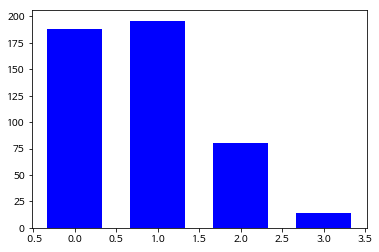

In [399]:
import plotly.plotly as py
import plotly.tools as tls

import matplotlib.pyplot as plt

dictionary = plt.figure()

y = [188, 196, 80, 14]
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")


# fig = plt.gcf()
# plotly_fig = tls.mpl_to_plotly(fig)
# py.iplot(plotly_fig, filename='mpl-basic-bar')

# D = {u'여자아이돌 가사 속 오빠': 188, u'남자아이돌 가사 속 오빠': 196, u'남자아이돌 가사 속 누나': 80, u'여자아이돌 가사 속 누나': 14}

# plt.bar(range(len(D)), D.values(), align='center')
# plt.xticks(range(len(D)), D.keys())

# plotly_fig = tls.mpl_to_plotly(dictionary)
# py.iplot(plotly_fig, filename='mpl-dictionary')

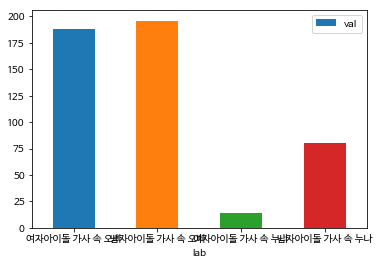

In [424]:
>>> df = pd.DataFrame({'lab':['여자아이돌 가사 속 오빠', '남자아이돌 가사 속 오빠', '여자아이돌 가사 속 누나', '남자아이돌 가사 속 누나'], 'val':[188, 196, 14, 80]})
>>> ax = df.plot.bar(x='lab', y='val', rot=0)

In [31]:
category_count = pd.Series([188, 196, 14, 80], index=['여자아이돌 가사 속 오빠', '남자아이돌 가사 속 오빠', '여자아이돌 가사 속 누나', '남자아이돌 가사 속 누나', ])

In [32]:
category_count

여자아이돌 가사 속 오빠    188
남자아이돌 가사 속 오빠    196
여자아이돌 가사 속 누나     14
남자아이돌 가사 속 누나     80
dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

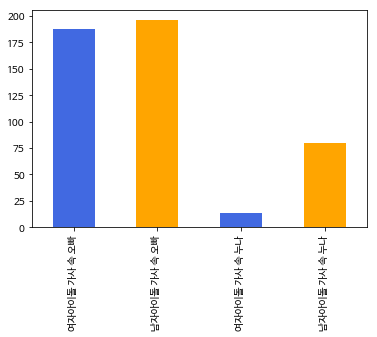

In [447]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = 'NanumBarunGothic'
category_count.plot(kind='bar', color=['royalblue', 'orange', 'royalblue', 'orange'])  #X11 color names 로 검색
# plt.bar(y_pos, height, color=['blue', 'orange', 'blue', 'orange',])
plt.xticks(rotation=90)

In [409]:
df

,lab,val
0,여자아이돌 가사 속 오빠,188
1,남자아이돌 가사 속 오빠,196
2,남자아이돌 가사 속 누나,80
3,여자아이돌 가사 속 누나,14


In [466]:
df = pd.DataFrame({'lab':['여자아이돌 가사 속 오빠', '남자아이돌 가사 속 오빠', '여자아이돌 가사 속 누나', '남자아이돌 가사 속 누나'], 'val':[188, 196, 14, 80]})
df.groupby(["lab", "val"])
df

,lab,val
0,여자아이돌 가사 속 오빠,188
1,남자아이돌 가사 속 오빠,196
2,여자아이돌 가사 속 누나,14
3,남자아이돌 가사 속 누나,80


In [11]:
df = pd.DataFrame({'여자아이돌 가사':["오빠", "누나"], '남자아이돌 가사':["오빠", "누나"], 'val':[188, 196]})
# df.set_index('1', '2')
df.groupby(["여자아이돌 가사", "남자아이돌 가사"])
df

,여자아이돌 가사,남자아이돌 가사,val
0,오빠,오빠,188
1,누나,누나,196


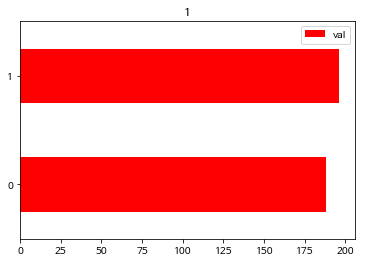

In [10]:
ax = df.plot(kind="barh", title="1", stacked=True,color=["red", "cornflowerblue","coral","green","yellow","indigo","pink","brown","lightblue","darkorchid"])
ax
#

In [2]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()


<Figure size 640x480 with 1 Axes>

In [448]:
plt.figure(figsize=(6, 4))

series_labels = ['Series 1', 'Series 2']

data = [
    [0.2, 0.3, 0.35, 0.3],
    [0.8, 0.7, 0.6, 0.5]
]

category_labels = ['Cat A', 'Cat B', 'Cat C', 'Cat D']

stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=True, 
    value_format="{:.1f}",
    y_label="Quantity (units)"
)

plt.savefig('bar.png')
plt.show()

NameError: name 'stacked_bar' is not defined

<Figure size 432x288 with 0 Axes>

In [404]:
from plotnine import * # 시각화 도구인 plotnine import

# 불필요한 warnings을 찍지 않기 위해 import 해오기
import warnings
warnings.filterwarnings('ignore')

In [ ]:
(ggplot(df)
 + aes(x='가게명', y='질문1')
 + geom_col(fill='skyblue')
 + ggtitle('캐주얼한 패션몰 수')
 + theme(text=element_text(family='NanumSquare'),
        axis_text_x=element_text(rotation=70))
)

In [335]:
# 여자아이돌 가사 속 너
import re

r = re.compile("너")
newlist = list(filter(r.match, tokens_all)) # Read Note
print(len(newlist), newlist)

23031 ['너무', '너만을', '너의', '너는', '너만을', '너에게', '너의', '너는', '너만을', '너만을', '너무도', '너무도', '너를', '너무', '너의', '너를', '너무', '너의', '너무', '너의', '너를', '너를', '너의', '너에게', '너를', '너를', '너의', '너에', '너의', '너의', '너의', '너의', '너와', '너를', '너무', '너의', '너의', '너의', '너의', '너의', '너에', '너의', '너의', '너의', '너는', '너를', '너에게', '너를', '너란걸', '너의', '너에게', '너를', '너의', '너때문에', '너너너', '너를지켜보고', '너무', '너였잖아', '너였잖아', '너만을', '너의', '너에게', '너만큼', '너무싫어', '너에게', '너만큼', '너무쉽게', '너의곁에', '너만의', '너의', '너무쉽게', '너의곁에', '너만의', '너무쉽게', '너의곁에', '너만의', '너자꾸', '너무많은', '너의', '너자꾸', '너자꾸', '너만을', '너의', '너의', '너에', '너의', '너에게', '너처럼', '너에', '너의', '너에게', '너처럼그', '너에대한', '너의', '너에게', '너처럼', '너무나도', '너무', '너보다', '너무', '너', '너무나도', '너만큼', '너의', '너를불러', '너희는', '너에게', '너에게', '너에게', '너도', '너에게', '너무나', '너는', '너', '너의', '너무', '너', '너의', '너의', '너의', '너의', '너와', '너가', '너의', '너와', '너의', '너를', '너를', '너의', '너의', '너에게로', '너를', '너를', '너의', '너무나', '너를', '너를', '너의', '너를', '너와', '너는', '너를', '너와', '너는', '너를', '너와', '너는', '너를', '너를', '너를', '너의', '너와', '너무', '너

In [334]:
# 남자아이돌 가사 속 너
import re

r = re.compile("너")
newlist2 = list(filter(r.match, tokens_all2)) # Read Note
print(len(newlist2), newlist2)

50908 ['너의', '너의', '너의', '너는', '너의', '너의', '너의', '너무', '너무', '너의모든', '너의', '너의', '너와', '너를', '너무', '너와', '너와', '너에게', '너는', '너를', '너만의', '너를', '너를', '너를', '너를', '너무나', '너무나', '너에게', '너무', '너의', '너무도', '너도', '너를', '너를', '너를', '너를', '너무나', '너무나', '너를', '너의', '너는', '너의', '너무', '너를', '너는', '너무', '너를', '너를', '너의', '너를', '너무', '너에게', '너는', '너의', '너희들의', '너무', '너희들의', '너희들의', '너희들의', '너희들의', '너희들을', '너는', '너를', '너', '너무', '너로', '너로', '너의', '너는', '너와', '너를', '너와', '너무', '너무', '너의', '너의', '너의', '너의', '너의', '너의', '너에겐', '너에겐', '너에겐', '너의', '너무', '너무닮았어', '너무', '너를', '너도', '너를', '너를', '너의', '너를', '너를', '너를', '너를', '너를', '너의', '너를', '너무나도', '너무', '너를', '너는', '너무', '너의', '너의', '너를', '너의', '너의', '너의', '너를', '너의', '너의', '너를', '너를', '너에게', '너를', '너에게', '너를', '너의', '너무나도', '너무', '너를', '너무', '너무', '너로', '너로', '너는', '너무', '너무', '너무', '너를', '너무', '너무나도', '너를', '너무', '너무', '너를', '너를', '너도', '너를', '너를', '너의', '너를', '너를', '너를', '너를', '너를', '너를', '너를', '너는', '너무', '너로', '너로', '너를', '너를', '너는', '너는', '너를', '너를

In [210]:
Counter(newlist).most_common(20)

[('말아요', 273),
 ('있어요', 164),
 ('없어요', 157),
 ('몰라요', 148),
 ('있나요', 133),
 ('해봐요', 130),
 ('좋아요', 122),
 ('않아요', 113),
 ('그래요', 105),
 ('싶어요', 101),
 ('아나요', 93),
 ('주세요', 89),
 ('없나요', 84),
 ('믿어요', 82),
 ('말해요', 73),
 ('알아요', 68),
 ('같아요', 65),
 ('뭐예요', 60),
 ('거예요', 58),
 ('건가요', 53)]

In [211]:
Counter(newlist2).most_common(20)

[('말아요', 407),
 ('있어요', 260),
 ('있나요', 229),
 ('없어요', 186),
 ('않아요', 123),
 ('알아요', 121),
 ('싶어요', 120),
 ('믿어요', 116),
 ('같아요', 114),
 ('그래요', 107),
 ('잡아요', 85),
 ('없나요', 85),
 ('줄게요', 80),
 ('몰라요', 71),
 ('안돼요', 69),
 ('떠나요', 67),
 ('거예요', 65),
 ('없네요', 65),
 ('말해요', 62),
 ('웃어요', 59)]

In [310]:
Counter(newlist).most_common(30)

[('하지마', 449),
 ('가지마', 194),
 ('떠나지마', 77),
 ('떠나가지마', 56),
 ('찾지마', 52),
 ('바라보지마', 48),
 ('웃지마', 41),
 ('보지마', 38),
 ('멈추지마', 35),
 ('망설이지마', 32),
 ('행복하지마', 32),
 ('놓지마', 31),
 ('걱정하지마', 29),
 ('말하지마', 28),
 ('울리지마', 28),
 ('잊지마', 26),
 ('부르지마', 23),
 ('서두르지마', 19),
 ('붙지마', 19),
 ('주저하지마', 17),
 ('이러지마', 17),
 ('기다리지마', 17),
 ('두지마', 16),
 ('가져가지마', 16),
 ('오지마', 15),
 ('생각하지마', 15),
 ('놓치지마', 15),
 ('착각하지마', 15),
 ('묻지마', 15),
 ('잡지마', 15)]

In [311]:
Counter(newlist2).most_common(30)

[('하지마', 695),
 ('가지마', 232),
 ('떠나지마', 137),
 ('울지마', 128),
 ('잊지마', 113),
 ('멈추지마', 89),
 ('떠나가지마', 85),
 ('걱정하지마', 73),
 ('보지마', 73),
 ('이러지마', 65),
 ('말하지마', 60),
 ('막지마', 39),
 ('두지마', 37),
 ('망설이지마', 37),
 ('버리지마', 35),
 ('놓지마', 35),
 ('까불지마', 35),
 ('찾지마', 33),
 ('사랑하지마', 32),
 ('생각하지마', 28),
 ('포기하지마', 28),
 ('살지마', 24),
 ('말리지마', 24),
 ('피하지마', 23),
 ('쓰지마', 20),
 ('믿지마', 20),
 ('슬퍼하지마', 18),
 ('착각하지마', 18),
 ('놓치지마', 18),
 ('의심하지마', 18)]

In [314]:
Counter(newlist).most_common(30)

[('하지마', 449),
 ('가지마', 194),
 ('찾지마', 52),
 ('웃지마', 41),
 ('보지마', 38),
 ('놓지마', 31),
 ('잊지마', 26),
 ('붙지마', 19),
 ('두지마', 16),
 ('오지마', 15),
 ('묻지마', 15),
 ('잡지마', 15),
 ('팔지마', 15),
 ('속지마', 13),
 ('굴지마', 13),
 ('울지마', 9),
 ('먹지마', 9),
 ('치지마', 9),
 ('쓰지마', 8),
 ('듣지마', 8),
 ('빼지마', 8),
 ('막지마', 6),
 ('놀지마', 6),
 ('대지마', 5),
 ('주지마', 5),
 ('걸지마', 5),
 ('내지마', 3),
 ('믿지마', 3),
 ('갖지마', 3),
 ('있지마', 3)]

In [315]:
Counter(newlist2).most_common(30)

[('하지마', 695),
 ('가지마', 232),
 ('울지마', 128),
 ('잊지마', 113),
 ('보지마', 73),
 ('막지마', 39),
 ('두지마', 37),
 ('놓지마', 35),
 ('찾지마', 33),
 ('살지마', 24),
 ('쓰지마', 20),
 ('믿지마', 20),
 ('입지마', 18),
 ('묻지마', 16),
 ('쫄지마', 16),
 ('갖지마', 14),
 ('있지마', 14),
 ('잡지마', 11),
 ('되지마', 11),
 ('웃지마', 11),
 ('짓지마', 10),
 ('빼지마', 10),
 ('주지마', 9),
 ('숨지마', 9),
 ('떨지마', 9),
 ('오지마', 9),
 ('튀지마', 8),
 ('내지마', 7),
 ('받지마', 5),
 ('잃지마', 5)]

In [ ]:
male['lyrics'][male['lyrics'].str.contains('해줄게')]

In [ ]:
doit = doit['lyrics'][female['lyrics'].str.contains('해줄게')]

In [ ]:
search_word2 = '해줄게'

In [ ]:
indices = [i for i, x in enumerate() if x == search_word2]

In [ ]:
next_word = tokens_all[tokens_all.index(search_word2):tokens_all.index(search_word) + 5]
next_word

In [ ]:
# tf-idf로 여자 아이돌의 가사에만 많이 나오는 단어, 남자 아이돌의 가사에만 많이 나오는 단어를 보고 싶다.

In [ ]:
# 정규표현식을 이용하여 어떤 어미가 쓰였는지 알아본다.
import re

r = re.compile(".줄게$")
newlist2 = list(filter(r.match, tokens_all2)) # Read Note
print(newlist2)